#Clases

Son estructuras que tienen atributos y metodos, actuan igual que un tipo de dato.


**Constructor**

El constructor es una funcion que inicia el objeto cuando se instancia


```python
class <nombre>:
  def __init__(self,<atributos>):
    <estamentos>
```

Los objetos tienen atributos y metodos

```python
class <nombre>:
  <atributos accesibles desde la clase>
  def __init__(self,<atributos>):
    <estamentos y atributos accesibles desde el objeto>
  def <metodo 1>(<parametros>):
    <estamentos>
  .
  .
  .
  def <metodo n>(<parametros>):
    <estamentos>
```



Una clase puede estar con el unico objetivo de guardar ciertos valores, de forma que no se cree un constructor sino que se accede a los atributos para obtener un valor

In [ ]:
class fisica:
  K=9e9
  G=6e-11
  g=9.8
print(fisica.g)

9.8


El uso principal de las clases es abstraer las propiedades de un objeto o de una familia de objetos a una estructura facil de manipular dentro del codigo

In [ ]:
class Vector:
  def __init__(self,i,j,k):
    self.i=i
    self.j=j
    self.k=k
  def magn(self):
    return pow(pow(self.i,2)+pow(self.j,2)+pow(self.k,2),1/2)

  def ppunto(vec1,vec2):
    return vec1.i*vec2.i+vec1.j*vec2.j+vec1.k*vec2.k

  def normalizar(vec):
    mag=vec.magn()
    return Vector(vec.i/mag, vec.j/mag, vec.k/mag)

vec=Vector(2,3,4)
print("{}i + {}j + {}k".format(vec.i,vec.j,vec.k))
print(vec.magn())

print(Vector.ppunto(vec,Vector(5,6,2)))

vn=Vector.normalizar(vec)

print("{}i + {}j + {}k".format(vn.i,vn.j,vn.k))
print(vn.magn())

2i + 3j + 4k
5.385164807134504
36
0.3713906763541037i + 0.5570860145311556j + 0.7427813527082074k
1.0


**Herencia**

La herencia es una forma de hacer que una nueva clase "herede" los atributos y metodos de la clase padre, ademas puede agregar nuevos atributos y metodos.

Siempre se recomienda que cuando se hace un proyecto se debe construir clases muy abstractas y estables para construir a partir de ellas.

In [ ]:
class Persona:
  def __init__(self,id,nombre,apellido):
    self.id=id
    self.nombre=nombre
    self.apellido=apellido
  def presentarse(self):
    return "Hola, soy {} {}".format(self.nombre,self.apellido)


class Estudiante(Persona):
  def __init__(self,id,nombre,apellido,codigo,carrera):
    super().__init__(id,nombre,apellido)
    self.codigo=codigo
    self.carrera=carrera
  def presentarEstudiante(self):
    return "Hola, soy {} {} codigo {} de la carrera de {}".format(self.nombre,self.apellido,self.codigo,self.carrera)

import numpy as np
EST=Estudiante(np.random.randint(1000000000,9999999999),"Juan","Rodriguez",np.random.randint(100000000,999999999),"Ing. Sistemas")

print(EST.presentarse())
print(EST.presentarEstudiante())

    

Hola, soy Juan Rodriguez
Hola, soy Juan Rodriguez codigo 399109040 de la carrera de Ing. Sistemas


#Grafos

Para ilustrar el uso de clases y herencia entre clases se puede tomar el ejemplo de los grafos.



##Listas ligadas

Una lista ligada son elementos dinamicos que guardan una informacion de forma sucesiva, se puede ver como un grafo dirigido en el cual un nodo apunta al siguiente nodo y asi sucesivamente hasta no hayan mas, son similares a las listas nativas de python.

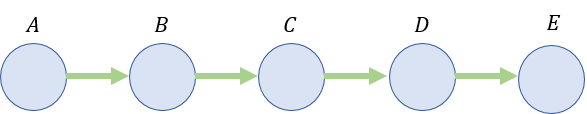


Nodo | Siguiente
---|---
A|B
B|C
C|D
D|E
E|None

In [ ]:
class Lista:
  def __init__(self,siguiente=None):
    self.siguiente=siguiente
  def append(self,lista):
    w=self
    while w.siguiente!=None:
      w=w.siguiente
    w.siguiente=lista

**Ejemplo 1**

In [ ]:
class Edificio(Lista):
  def __init__(self,piso,disponible,siguiente=None):
    super().__init__(siguiente)
    self.piso=piso
    self.disponible=disponible
  def info(self):
    print("Piso {:10}, Disponibilidad: {}".format(self.piso,self.disponible))

a=Edificio(1,True)
b=Edificio(2,False)
a.append(b)


a.info()
a.siguiente.info()

b.disponible=True

a.info()
a.siguiente.info()

Piso          1, Disponibilidad: True
Piso          2, Disponibilidad: False
Piso          1, Disponibilidad: True
Piso          2, Disponibilidad: True


**Ejemplo 2**

In [ ]:
class Lista:
  def __init__(self, siguiente=None, inicio=None, n=0):
    self.siguiente=siguiente
    self.n=n
    self.inicio=inicio
  def last(self):
    w=self
    n=0
    while w.siguiente!=None:
      w=w.siguiente
      n+=1
    return w, n
  def append(self,lista):
    w,n=self.last()
    w.siguiente=lista
    w.siguiente.n=n+1

In [ ]:
class ListaI(Lista):
  def append(self,lista):
    w,n=self.last()
    w.siguiente=lista
    w.siguiente.n=n+1
    w.siguiente.inicio=self
  def info(self):
    return "{:5} inicio: {:}, siguiente: {:}".format(self.n,(self.inicio.n if self.inicio!=None else "None"),(self.siguiente.n if self.siguiente!=None else "None"))
  def Mostrar_lista(self):
    w=self
    while w!=None:
      print(w.info())
      w=w.siguiente


a=ListaI()
for i in range(10):
  a.append(ListaI())

a.Mostrar_lista()

    0 inicio: None, siguiente: 1
    1 inicio: 0, siguiente: 2
    2 inicio: 0, siguiente: 3
    3 inicio: 0, siguiente: 4
    4 inicio: 0, siguiente: 5
    5 inicio: 0, siguiente: 6
    6 inicio: 0, siguiente: 7
    7 inicio: 0, siguiente: 8
    8 inicio: 0, siguiente: 9
    9 inicio: 0, siguiente: 10
   10 inicio: 0, siguiente: None


In [ ]:
class Persona(ListaI):
  def __init__(self, nombre, edad, sexo, rol, siguiente=None, inicio=None, n=0):
    super().__init__(siguiente, inicio, n)
    self.nombre=nombre
    self.edad=edad
    self.sexo=sexo
    self.rol=rol
  def info(self):
    return "Nombre {:10} Edad {:10} Sexo {:10} {}".format(self.nombre,self.edad,self.sexo,self.rol)
  def append(self,lista):
    super().append(lista)

vendedores={
    1: Persona("Alejandro A",24,"Masculino","Vendedor"),
    2: Persona("Luis R", 28,"Masculino","Vendedor")
}

clientes={
    1: Persona("Alfonso H", 34,"Masculino", "Cliente"),
    2: Persona("Fernando R", 24,"Masculino","Cliente"),
    3: Persona("Laura A", 20, "Femenino", "Cliente"),
    4: Persona("Eduardo B", 39, "Masculino","Cliente"),
    5: Persona("Luz R", 45, "Femenino", "Cliente")
}




vendedores[1].append(clientes[1])
vendedores[1].append(clientes[3])
vendedores[1].append(clientes[5])

vendedores[2].append(clientes[2])
vendedores[2].append(clientes[4])

print("Buscar los clientes desde los vendedores")
vendedores[1].Mostrar_lista()
print("\n\n")
vendedores[2].Mostrar_lista()
print("\n\n")

print("Buscar los vendedores desde los clientes")
for i in range(1,5):
  print(i,clientes[i].inicio.info())

Buscar los clientes desde los vendedores
Nombre Alejandro A Edad         24 Sexo Masculino  Vendedor
Nombre Alfonso H  Edad         34 Sexo Masculino  Cliente
Nombre Laura A    Edad         20 Sexo Femenino   Cliente
Nombre Luz R      Edad         45 Sexo Femenino   Cliente



Nombre Luis R     Edad         28 Sexo Masculino  Vendedor
Nombre Fernando R Edad         24 Sexo Masculino  Cliente
Nombre Eduardo B  Edad         39 Sexo Masculino  Cliente



Buscar los vendedores desde los clientes
1 Nombre Alejandro A Edad         24 Sexo Masculino  Vendedor
2 Nombre Luis R     Edad         28 Sexo Masculino  Vendedor
3 Nombre Alejandro A Edad         24 Sexo Masculino  Vendedor
4 Nombre Luis R     Edad         28 Sexo Masculino  Vendedor
